# ETHICS dataset

In [24]:
from datasets import get_dataset_config_names, load_dataset
import pandas as pd
from tabulate import tabulate
from dotenv import load_dotenv
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Setup paths

In [ ]:
load_dotenv()


parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)


datasets_dir=os.getenv("DATASETS_DIR")
datasets_dir_path=os.path.join(parent_dir, datasets_dir)
ethics_dir = os.path.join(datasets_dir_path, "ethics")
os.makedirs(ethics_dir, exist_ok=True)

#### Auxiliary methods

In [8]:
def summarize_ethics_splits():
    dataset_name = "hendrycks/ethics"
    subcategories = get_dataset_config_names(dataset_name)

    table = []
    headers = ["Subcategory", "Train", "Test", "Validation"]

    for subcat in subcategories:
        dataset = load_dataset(dataset_name, subcat)
        row = [subcat]
        for split in ["train", "test", "validation"]:
            if split in dataset:
                row.append(len(dataset[split]))
            else:
                row.append("-")
        table.append(row)

    print(tabulate(table, headers=headers, tablefmt="grid"))

In [12]:
def plot_char_length_histogram(df: pd.DataFrame):
    char_lengths = [len(row['input']) for _, row in df.iterrows() if 'input' in row]

    sns.set_theme(style="whitegrid", context="paper", font_scale=1.4)
    plt.figure(figsize=(8, 5))

    sns.histplot(char_lengths, bins=50, color="skyblue", edgecolor="black")

    plt.xlabel("Total Characters per Example", labelpad=10)
    plt.ylabel("Number of Samples", labelpad=10)
    plt.title("Character Length Distribution")

    plt.tight_layout()
    plt.show()


In [37]:
def plot_label_distribution(df: pd.DataFrame):
    label_counts = df['label'].value_counts().sort_index()
    
    plot_df = pd.DataFrame({
        "Label": ['Morally Accepted', 'Morally Unaccepted'],
        "Count": label_counts.values
    })

    fig = px.bar(
        plot_df,
        x="Label",
        y="Count",
        text="Count",
        color="Label"
    )

    fig.update_traces(textposition="outside", marker_line_width=1.5)

    fig.update_layout(
        title="Moral Judgment Label Distribution",
        title_font=dict(size=18, family="Arial", color="black"),
        xaxis_title="Label Meaning",
        yaxis_title="Number of Samples",
        xaxis_tickfont=dict(size=13),
        yaxis_tickfont=dict(size=13),
        font=dict(family="Arial", size=13),
        template="plotly_white",
        showlegend=False,
        margin=dict(l=40, r=30, t=70, b=50),
        width=800,
        height=500,
    )

    fig.show()

In [19]:
def print_input_length_stats(df1: pd.DataFrame, df2: pd.DataFrame):
    print("Average Length of 'input' Text (in characters)\n")

    lengths_1 = df1['input'].apply(len)
    lengths_2 = df2['input'].apply(len)

    print(f"Subset 1 (first 1700 rows): {lengths_1.mean():.2f} characters")
    print(f"Subset 2 (remaining rows): {lengths_2.mean():.2f} characters\n")

### Dataset details

In [11]:
summarize_ethics_splits()

+----------------+---------+--------+--------------+
| Subcategory    |   Train |   Test |   Validation |
+================+=========+========+==============+
| commonsense    |   13910 |   3964 |         3885 |
+----------------+---------+--------+--------------+
| deontology     |   18164 |   3536 |         3596 |
+----------------+---------+--------+--------------+
| justice        |   21791 |   2052 |         2704 |
+----------------+---------+--------+--------------+
| utilitarianism |   13737 |   4271 |         4807 |
+----------------+---------+--------+--------------+
| virtue         |   28245 |   4780 |         4975 |
+----------------+---------+--------+--------------+


### Commonsense test split character length distribution

In [13]:
test_commonsense = load_dataset("hendrycks/ethics", "commonsense", split="test")
test_commonsense_df = test_commonsense.to_pandas()

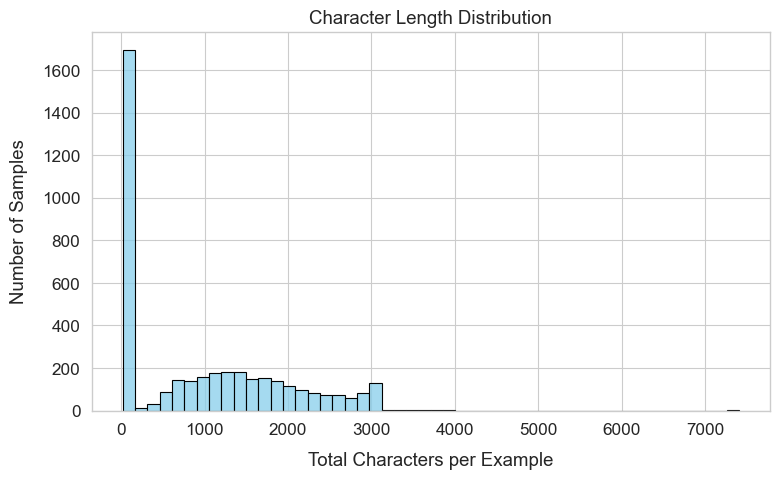

In [14]:
plot_char_length_histogram(test_commonsense_df)

### Subset lengths

In [20]:
subset_1 = test_commonsense_df.head(1700)
subset_2 = test_commonsense_df.tail(len(test_commonsense_df) - 1700)

print_input_length_stats(subset_1, subset_2)

Average Length of 'input' Text (in characters)

Subset 1 (first 1700 rows): 61.80 characters
Subset 2 (remaining rows): 1635.97 characters



### Final dataset distribution by label

In [38]:
plot_label_distribution(subset_1)

In [ ]:
subset_1.to_csv(os.path.join(ethics_dir, "ethics_commonsense.csv"), index=False)